# 機械特性関連を計算するnotebook

## フォルダの準備

In [1]:
from mlptools.analyzer.elastic import ElasticConstantsCalculator

In [11]:
path2n2p2_result = "/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang"
path2template = "/sqfs2/cmc/1/work/G15529/v60746/result/lammps/Si/elastic/template"

calculator = ElasticConstantsCalculator(
    path2n2p2_result=path2n2p2_result,
    path2template=path2template
)
calculator.setup(
    path2target=path2n2p2_result,
    atomic_number_list=[14]
)

Create directory /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic
epoch: 0
[COPY] /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/weights.014.000000.out to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_0
[RENAME] weights.014.000000.out to weights.014.data
epoch: 1
[COPY] /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/weights.014.000001.out to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_1
[RENAME] weights.014.000001.out to weights.014.data
epoch: 2
[COPY] /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/weights.014.000002.out to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_2
[RENAME] weights.014.000002.out to weights.014.data
epoch: 3
[COPY] /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/weights.014.000003.out to /sqfs2/cmc/1/work/G15529/v60746

## 結果の可視化を行う

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [3]:
path2target = '/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic'
elastic_dirs = glob(f'{path2target}/e_*')
print(f"Number of elastic dir: {len(elastic_dirs)}")

Number of elastic dir: 201


In [4]:
calculator = ElasticConstantsCalculator()
props_dict = calculator.get_mechanical_props_dict(elastic_dir_path_list=elastic_dirs)
mechanical_prop_df = calculator.get_mechanical_props_df(
    props_dict=props_dict
)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

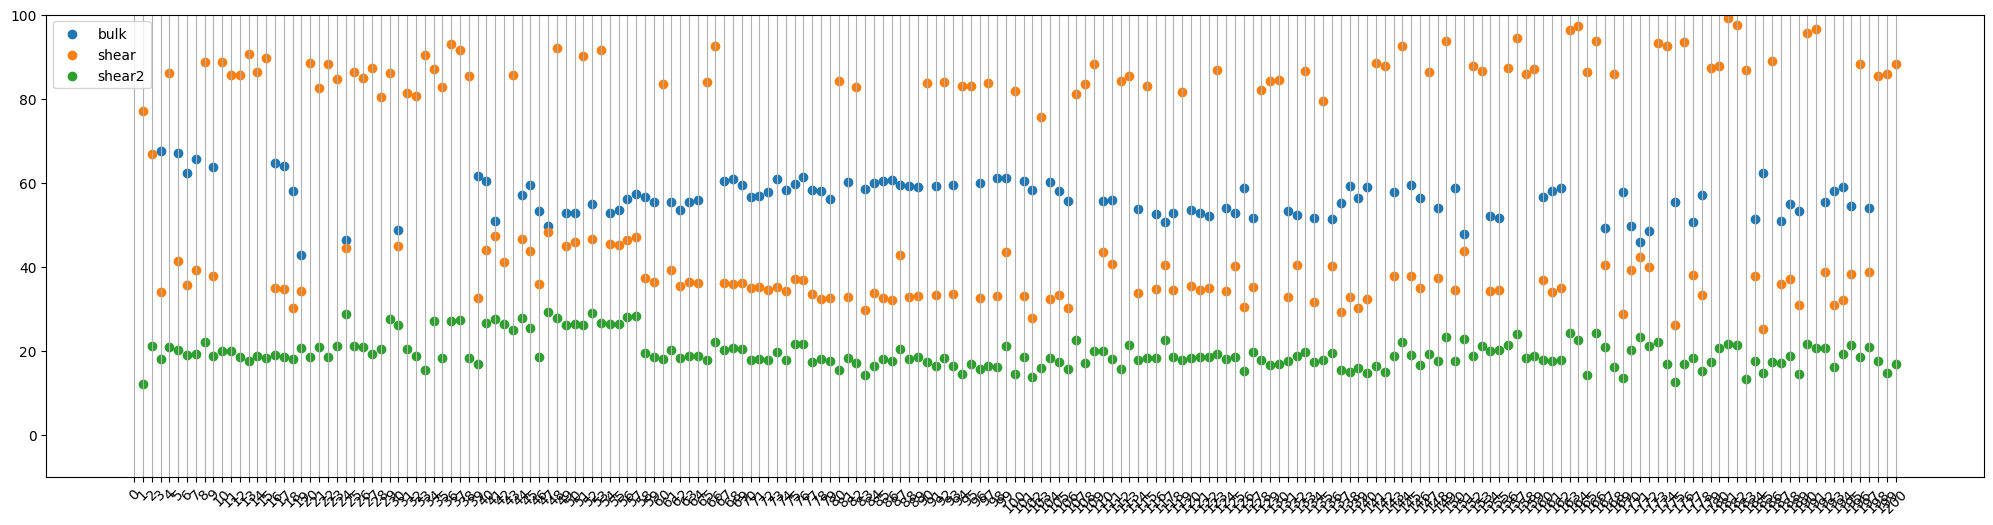

In [5]:
fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(111)

ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['bulk_modulus'], label='bulk')
ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['shear_modulus'], label='shear')
ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['shear_modulus2'], label='shear2')
ax.grid(axis='x')
ax.legend()
ax.set_ylim(-10, 100)
ax.set_xticks(sorted(mechanical_prop_df['epoch'].values))
plt.xticks(rotation=45)

In [6]:
mechanical_prop_df.query("epoch == 57")

,epoch,c11,c12,c44,bulk_modulus,shear_modulus,shear_modulus2,poisson_ratio
57,57,94.890603,38.390707,47.047953,57.224006,47.047953,28.249948,0.288043


In [7]:
from mlptools.analyzer.elastic import MechanicalProps

quantum_espresso_mechanical_props = MechanicalProps(
    c11=153.371883,
    c12=56.731825,
    c44=77.381183,
    bulk_modulus=88.945178,
    shear_modulus=65.756721,
    shear_modulus2=np.inf,
    poisson_ratio=0.20344
)
def calc_mechanical_props_diff(predicted: MechanicalProps, reference: MechanicalProps):
    # calculate absolute error % of mechanical properties
    diff = {}
    for k, v in predicted.model_dump().items():
        diff[k] = np.abs(v - getattr(reference, k)) / getattr(reference, k) * 100
    return diff

epoch_error_dict = {}
for epoch, predicted_mechanical_props in props_dict.items():
    mechanical_props_diff_dict = calc_mechanical_props_diff(
        predicted=predicted_mechanical_props,
        reference=quantum_espresso_mechanical_props
    )
    # remove shear_modulus2
    del mechanical_props_diff_dict['shear_modulus2']

    # sum of absolute error
    total_error = sum(mechanical_props_diff_dict.values())
    print(f"Epoch: {epoch}, Total Error: {total_error:.2f} %")
    epoch_error_dict[epoch] = total_error

Epoch: 103, Total Error: 125546.69 %
Epoch: 101, Total Error: 277.17 %
Epoch: 53, Total Error: 600040.40 %
Epoch: 55, Total Error: 234.28 %
Epoch: 149, Total Error: 1268914.32 %
Epoch: 92, Total Error: 592768.27 %
Epoch: 193, Total Error: 296.32 %
Epoch: 75, Total Error: 257.90 %
Epoch: 130, Total Error: 605979.60 %
Epoch: 16, Total Error: 258.72 %
Epoch: 144, Total Error: 1151658.53 %
Epoch: 137, Total Error: 310.99 %
Epoch: 104, Total Error: 279.61 %
Epoch: 179, Total Error: 1627404.44 %
Epoch: 190, Total Error: 1873843.89 %
Epoch: 142, Total Error: 939027.79 %
Epoch: 8, Total Error: 2182947.69 %
Epoch: 124, Total Error: 290.59 %
Epoch: 112, Total Error: 1308368.37 %
Epoch: 108, Total Error: 418767.74 %
Epoch: 48, Total Error: 1450477.84 %
Epoch: 1, Total Error: 1941040.65 %
Epoch: 186, Total Error: 2018624.19 %
Epoch: 18, Total Error: 292.48 %
Epoch: 182, Total Error: 1835518.34 %
Epoch: 173, Total Error: 1587864.34 %
Epoch: 125, Total Error: 274.60 %
Epoch: 64, Total Error: 278.42 

/tmp/ipykernel_609265/4010514879.py:16: RuntimeWarning: invalid value encountered in scalar divide
  diff[k] = np.abs(v - getattr(reference, k)) / getattr(reference, k) * 100


In [8]:
# print 5 epochs with lowest error
sorted_epoch_error_dict = sorted(epoch_error_dict.items(), key=lambda x: x[1])
for epoch, error in sorted_epoch_error_dict[:10]:
    print(f"Epoch: {epoch}, Total Error: {error:.2f} %")

Epoch: 57, Total Error: 215.36 %
Epoch: 44, Total Error: 218.44 %
Epoch: 52, Total Error: 218.91 %
Epoch: 56, Total Error: 220.28 %
Epoch: 47, Total Error: 222.03 %
Epoch: 40, Total Error: 222.38 %
Epoch: 41, Total Error: 228.67 %
Epoch: 45, Total Error: 228.83 %
Epoch: 5, Total Error: 231.33 %
Epoch: 50, Total Error: 232.58 %
